# Numpy, Matplotlib, and Free Speed
---

<center><a href="https://numpy.org/"><img src='Figures/numpy.jpg'> Latest Version: v1.18 </a> <a href="https://matplotlib.org/"><img src='Figures/matplotlib.png'> Latest Version: v3.1.1</a></center>

## Part I: Numpy
---

Probably the central package for scientific computing in Python. Thoughtful usage of it can give you orders of magnitude speed increases in your code. It often also greatly streamlines the syntax.

It is particularly useful as a tool to manage $N$-dimensional arrays in a way that pure Python lists cannot.

In [1]:
import numpy as np

## Part II: Matplotlib
---

Another core Python package that is used to make publication ready plots and visualise data. It combines very naturally with Numpy as well as Pandas (a database library).

Both of these libraries have very detailed documentation on their websites, linked on the title page + Stack Exchange etc.

In [2]:
import matplotlib.pyplot as plt

## Part III: Free Speed
---

We will also look at some very simple examples of how to effortlessly find speed increases within your code:

1. Easy parallelisation with <a href="https://joblib.readthedocs.io/en/latest/">the Joblib Library</a>.
2. Further Numpy tips and Tricks.
3. Vectorizing and the C++ backend with <a href="https://numba.pydata.org/">Numba</a>.

In [3]:
from numba import vectorize, jit
from joblib import Parallel, delayed

## An Example - Analysing Patient Data

To illustrate the use of Numpy and Matplotlib, we are going to think about an example. This will explore the main concepts and functionality of the packages.

The data can be found <a href="https://github.com/swcarpentry/python-novice-inflammation/blob/gh-pages/data/inflammation-01.csv">here</a>. It contains data for the inflammation levels over time (columns) for given patients (rows). We start by importing the libraries:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

To load the data we use the `np.loadtxt` function.

In [5]:
data = np.loadtxt('patient_data.csv', delimiter=',')
print(data)
print('Array Type:\t', type(data))
print('Data Type:\t', data.dtype)
print('Data Shape:\t', data.shape)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]
Array Type:	 <class 'numpy.ndarray'>
Data Type:	 float64
Data Shape:	 (60, 40)


## Slicing Numpy Arrays

We are often interested in slicing the data arrays to access certain elements. Importantly the row/column counting starts at 0.

<img src="Figures/array_example.png">

Looking at our example:

In [6]:
print('First element:', data[0, 0])
print('Last Element:', data[-1, -1])
print('Sliced Array:\n', data[1:5, 0:10])

First element: 0.0
Last Element: 0.0
Sliced Array:
 [[0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]
 [0. 1. 1. 3. 3. 1. 3. 5. 2. 4.]]


We can also assign slices of a data array to a new variable:

In [7]:
small_array = data[:3, 36:]
print(small_array)

[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]


It is important to understand how normal Python operations act on Numpy arrays:

In [8]:
print(small_array, 'Original\n')
print(small_array * 2, 'Multiply by 2 elementwise\n')
print(small_array + 6, 'Add 6 elementwise')

[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]] Original

[[4. 6. 0. 0.]
 [2. 2. 0. 2.]
 [4. 4. 2. 2.]] Multiply by 2 elementwise

[[8. 9. 6. 6.]
 [7. 7. 6. 7.]
 [8. 8. 7. 7.]] Add 6 elementwise


### Investigating our Data

We are often interested in summary statistics to explore our data.

In [9]:
print('Global Mean:\t\t', np.mean(data))
print('Global Max:\t\t', np.max(data))
print('Global Std. Dev.:\t', np.std(data))

Global Mean:		 6.14875
Global Max:		 20.0
Global Std. Dev.:	 4.613833197118566


We can also look on a patient by patient basis by specifying an axis.

In [10]:
print('Patient Maximum:\n', data.max(axis=1), '\n')
print('Daily Mean:\n', data.mean(axis=0))

Patient Maximum:
 [18. 18. 19. 17. 17. 18. 17. 20. 17. 18. 18. 18. 17. 16. 17. 18. 19. 19.
 17. 19. 19. 16. 17. 15. 17. 17. 18. 17. 20. 17. 16. 19. 15. 15. 19. 17.
 16. 17. 19. 16. 18. 19. 16. 19. 18. 16. 19. 15. 16. 18. 14. 20. 17. 15.
 17. 16. 17. 19. 18. 18.] 

Daily Mean:
 [ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]


<center><img src='Figures/array_operations.png'></center>

## Visualising the Data

We want to very quickly illustrate some of the functionality of Matplotlib in exploring data. Again, this is not exactly exhaustive, and there is a lot more to do when it comes to making publication-quality plots. We can cover this later on if people are interested, however there are many answers on the official Matplotlib site.

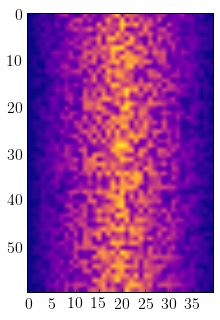

In [11]:
fig = plt.figure(figsize=(5,5))
image = plt.imshow(data)
plt.show()

## 2d-Plotting

As an example, let's look at how we can plot the average inflammation for each patient.

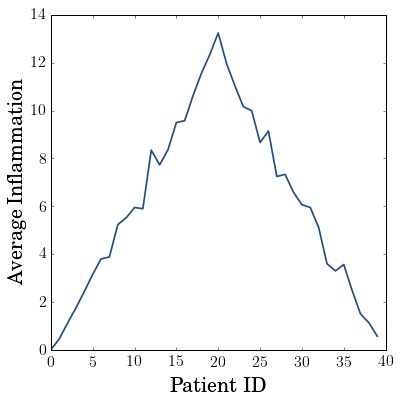

In [12]:
avg_inf = np.mean(data, axis=0)
fig = plt.figure(figsize=(6, 6))
plt.plot(avg_inf, c='#1D4E89')
plt.xlabel('Patient ID')
plt.ylabel('Average Inflammation')
plt.show()

We can also group subplots to show data at the same time.

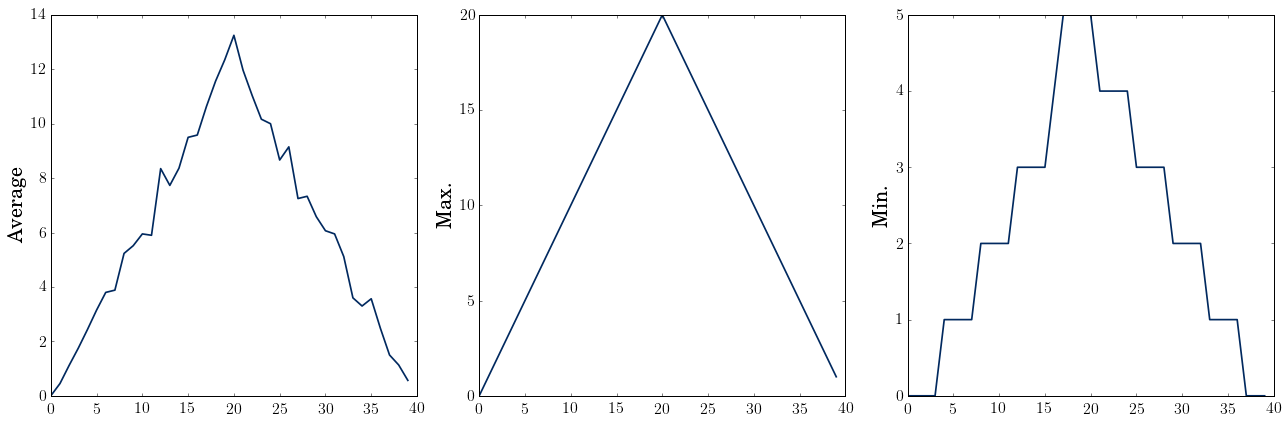

In [13]:
fig = plt.figure(figsize=(18, 6))
axes1, axes2, axes3 = fig.add_subplot(1, 3, 1), fig.add_subplot(1, 3, 2), fig.add_subplot(1, 3, 3)
axes1.plot(np.mean(data, axis=0)), axes1.set_ylabel('Average')
axes2.plot(np.max(data, axis=0)), axes2.set_ylabel('Max.')
axes3.plot(np.min(data, axis=0)), axes3.set_ylabel('Min.')
fig.tight_layout()

## Free Speed

There are a number of easy ways to speed up your codes. We will look at a couple of illustrative examples:

1. Numpy Tips and Tricks
2. Numba Vectorisation
3. Joblib Parallelisation

### 1. Numpy Tips and Tricks

The mantra for Numpy is that **array operations are always better than a for loop**. Later we will look at a way to make general functions *vectorised*. As an example consider:

In [14]:
import time
import numpy as np

start_time = time.time()

data = np.ones(shape=(1000, 1000), dtype=np.float)

for i in range(1000):
    for j in range(1000):
        data[i][j] *= 1.0000001
        data[i][j] *= 1.0000001
        data[i][j] *= 1.0000001
        data[i][j] *= 1.0000001
        data[i][j] *= 1.0000001

end_time = time.time()

print("Run time = {:.2f}s".format(end_time - start_time))

Run time = 2.67s


In [15]:
import time
import numpy as np

start_time = time.time()

num_multiplies = 1000000000
data = range(num_multiplies)
number = 1

number *= np.power(1.0000001, num_multiplies)

end_time = time.time()

print("Run time = {:.5f}s".format(end_time - start_time))

Run time = 0.00014s


### Booleans in Numpy

Another important Numpy concept is masking. To illustrate this idea consider the following:

In [16]:
mask_array = np.array([[1, 0],
                       [0, 1]])
test_array = np.array([[0, 0],
                       [0, 0]])
bool_array = (mask_array > 0)

test_array[bool_array] += 1
print('Boolean Array:\n', bool_array, '\n')
print('Test Array:\n', test_array)

Boolean Array:
 [[ True False]
 [False  True]] 

Test Array:
 [[1 0]
 [0 1]]


This is not possible with lists:

In [17]:
mask_list = [[1, 0], 
             [0, 1]]
mask_list > 0

TypeError: '>' not supported between instances of 'list' and 'int'

### 2a. Numba Vectorisation

The main concept that Numpy is built upon is vectorisation, where functions can act on entire arrays element by element. For example:

In [18]:
array = np.array([[2, 0],
                  [0, 2]])
print(np.power(array, 3))

[[8 0]
 [0 8]]


Not all functions that we might write will be automatically vectorised however (i.e. we cannot put in an array and get a sensible answer). For example, the following will not work:

In [19]:
def heaviside(x):
    if x > 0:
        return 1
    else:
        return 0
print('x = 5,', heaviside(5))
print('x = [5, -5],', heaviside(np.array([5, -5])))

x = 5, 1


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

To deal with this we can use a library called <a href="https://numba.pydata.org/">Numba</a> and add a **decorator** to our function to creat a *Numpy Universal Function*.

In [20]:
@vectorize(nopython=True)
def heaviside_vect(x):
    if x > 0:
        return 1
    else:
        return 0

print('x = 5 \t\t', heaviside_vect(5))
print('x = [5, -5] \t', heaviside_vect(np.array([5, -5])))

x = 5 		 1
x = [5, -5] 	 [1 0]


With this very simple example, we find over an **order of magnitude** speed increase.

In [21]:
import time
import numpy as np

start_time = time.time()

data = np.ones(shape=(1000, 1000), dtype=np.float)

for i in range(1000):
    for j in range(1000):
        data[i][j] = heaviside(data[i][j])

end_time = time.time()

print("Run time = {:.2f}s".format(end_time - start_time))

Run time = 1.01s


In [22]:
import time
import numpy as np

start_time = time.time()

data = np.ones(shape=(1000, 1000), dtype=np.float)

data = heaviside_vect(data)

end_time = time.time()

print("Run time = {:.2f}s".format(end_time - start_time))

Run time = 0.07s


### 2b. Numba Compilation

There is a linked concept that also requires a decorator above a function definition. This is the concept of pre-compiling a function before using it a number of times. The details regarding how this interfaces with the C++ backend to Python are unimportant, and we just consider an example.

In [23]:
x = np.arange(10000).reshape(100, 100)

@jit(nopython=True)
def go_fast(a):
    trace = 0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

# The first time round, the function must be compiled
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (with compilation) = {:.2f}s".format(end - start))

# Now the function is compiled
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (after compilation) = {:.6f}s".format(end - start))

Elapsed (with compilation) = 0.27s
Elapsed (after compilation) = 0.000051s


### 3. Easy Parallelisation

Finally, we provide a very simple example of how to parallelise for loops in Python. The exact improvement you get of course depends on the number of cores you have, but running on a cluster or a good desktop, you can find improvements of 10-100x with very little effort. To illustrate this we show how to transform a for loop into a parallelised form.

In [24]:
from joblib import Parallel, delayed

In [25]:
def add(x, y):
    return x + y

# For loop:
result = []
for x, y in zip([0, 1, 2], [4, 5, 6]):
    result.append(add(x, y))
    
# Parallelised:
result = Parallel(n_jobs=-1)(delayed(add)(x, y) for (x, y) in zip([0, 1, 2], [4, 5, 6]))

<center>
    
# Thank you, questions?

</center>